##TRANSFER LEARNING WITH TENSORFLOW : FINE TUNING

In [ ]:
!nvidia-smi

Sat Jul 30 12:20:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    29W /  70W |   2814MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-08-01 05:38:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-01 05:38:46 (87.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, unzip_data, plot_loss_curves, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-07-30 12:20:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  69.2MB/s    in 2.3s    

2022-07-30 12:21:01 (69.2 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
unzip_data('/content/10_food_classes_10_percent.zip')

In [ ]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
# Creating Training And Test Directory Paths
train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.09132652e+01 1.10714283e+01 1.21989794e+01]
   [1.83112240e+01 1.41173477e+01 1.12806129e+01]
   [1.44795914e+01 1.66224499e+01 1.01275511e+01]
   ...
   [1.45051165e+01 1.45051165e+01 1.65051155e+01]
   [1.36428576e+01 1.36428576e+01 1.56428576e+01]
   [1.46428576e+01 1.46428576e+01 1.66428566e+01]]

  [[1.71683674e+01 1.30255098e+01 1.40051022e+01]
   [1.97857151e+01 1.57857151e+01 1.46530628e+01]
   [1.53979607e+01 1.21734695e+01 7.41326571e+00]
   ...
   [1.32703876e+01 1.32703876e+01 1.52703876e+01]
   [1.40714283e+01 1.40714283e+01 1.60714283e+01]
   [1.31428566e+01 1.31428566e+01 1.51428566e+01]]

  [[1.66632652e+01 1.60204086e+01 1.43061228e+01]
   [2.48826561e+01 1.65561237e+01 1.41836739e+01]
   [3.11683674e+01 1.35969391e+01 8.16836739e+00]
   ...
   [1.25714064e+01 1.25714064e+01 1.45714064e+01]
   [1.60867500e+01 1.60867500e+01 1.80867500e+01]
   [1.49948559e+01 1.49948559e+01 1.69948559e+01]]

  ...

  [[2.39744205e+01 2.39744205e+01 2.55458927e+01]
   [1

##MODEL 0: BUILDING A TRANSFER LEARNING MODEL USING THE KERAS FUNCTIONAL API

In [ ]:
# 1. Creating A Base Model With tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freezing The Base Model
base_model.trainable = False

# 3. Creating inputs Into Our Model
inputs = tf.keras.layers.Input(shape=(224, 224, 3),name='INPUT_LAYER')

# 4. If we're using ResNet50V2, we'll need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Passing The inputs To The base_model
x = base_model(inputs)
print(f'Shape After Passing inputs Through Base Model: {x.shape}')

# 6. Averaging pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name='GLOBAL_AVERAGE_POOLING_LAYER')(x)
print(f'Shape After GlobalAveragePooling2D: {x.shape}')

# 7. Creating The output Activation Layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='OUTPUT_LAYER')(x)

# 8. Combining The inputs WIth The outputs Into A Model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compiling The Model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# 10. Fitting The Model
history_10percent = model_0.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name='TRANSFER_LEARNING',
                                                                        experiment_name='10_PERCENT_FEATURE_EXTRACTION')])

Shape After Passing inputs Through Base Model: (None, 7, 7, 1280)
Shape After GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: TRANSFER_LEARNING/10_PERCENT_FEATURE_EXTRACTION/20220730-122106
Epoch 1/5
24/24 [==============================] - 12s 243ms/step - loss: 1.8945 - accuracy: 0.4227 - val_loss: 1.3128 - val_accuracy: 0.7155
Epoch 2/5
24/24 [==============================] - 4s 153ms/step - loss: 1.1322 - accuracy: 0.7613 - val_loss: 0.9098 - val_accuracy: 0.8043
Epoch 3/5
24/24 [==============================] - 5s 183ms/step - loss: 0.8251 - accuracy: 0.8147 - val_loss: 0.7155 - val_accuracy: 0.8438
Epoch 4/5
24/24 [==============================] - 4s 155ms/step - loss: 0.6916 - accuracy: 0.8453 - val_loss: 0.6175 - val_accuracy: 0.8569
Epoch 5/5
24/24 [==============================] - 4s 154ms/step - loss: 0.5890 - accuracy: 0.8613 - val_loss: 0.6012 - val_accuracy: 0.8421


In [ ]:
# Evaluating On The Full test Dataset
model_0.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.6075 - accuracy: 0.8444


[0.6074941158294678, 0.8443999886512756]

In [ ]:
# Checking The layers In Our Base Model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_4
1 rescaling_3
2 normalization_3
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_3 (Rescaling)        (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_3 (Normalization  (None, None, None,   7          ['rescaling_3[0][0]']            
 )                              3)                                                   

In [ ]:
model_0.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT_LAYER (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GLOBAL_AVERAGE_POOLING_LAYE  (None, 1280)             0         
 R (GlobalAveragePooling2D)                                      
                                                                 
 OUTPUT_LAYER (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


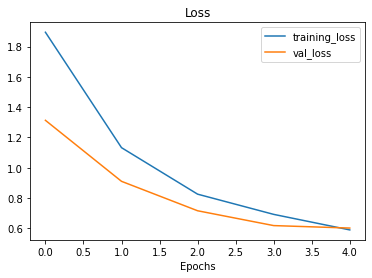

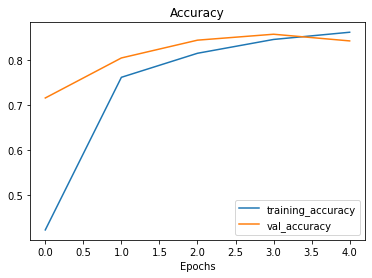

In [ ]:
# Checking Our Model's Training Curves
plot_loss_curves(history_10percent)

###GETTING A FEATURED VECTOR FROM OUR TRAINED MODEL

In [ ]:
# Defining The input shape
input_shape = (1, 7, 7, 3)

# Creating A Random Tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'Random Input Tensor:\n {input_tensor}\n')

# Passing the random tensor Through A GlobalAveragePooling 2D Layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'2D Global Average Pooled Random Tensor:\n {global_average_pooled_tensor}\n')

# Checking The Shape Of The Different Tensors
print(f'Shape Of Input Tensor: {input_tensor.shape}')
print(f'Shape Of Global Average Pooled 2D Tensor: {global_average_pooled_tensor.shape}')

Random Input Tensor:
 [[[[ 3.27468514e-01 -8.42625797e-01  3.19433689e-01]
   [-1.40755188e+00 -2.38805985e+00 -1.03924787e+00]
   [-5.57323217e-01  5.39707005e-01  1.69943225e+00]
   [ 2.88936555e-01 -1.50661159e+00 -2.64547408e-01]
   [-5.97224057e-01 -1.91711318e+00 -6.20441437e-01]
   [ 8.50402296e-01 -4.06047940e-01 -3.02584124e+00]
   [ 9.05846417e-01  2.98559874e-01 -2.25615546e-01]]

  [[-7.61644304e-01 -1.89171410e+00 -9.38471258e-01]
   [ 7.78522134e-01 -4.73388970e-01  9.77726936e-01]
   [ 2.46944040e-01  2.05737472e-01 -5.25623322e-01]
   [ 3.24100167e-01  2.54540909e-02 -1.06384970e-01]
   [-6.36947513e-01  1.16031218e+00  2.50735909e-01]
   [-4.17285025e-01  4.01257813e-01 -1.41454434e+00]
   [-5.93185723e-01 -1.66172135e+00  3.35671932e-01]]

  [[ 1.08156286e-01  2.34796822e-01 -5.66687644e-01]
   [-3.58198434e-01  8.86986136e-01  5.27447641e-01]
   [ 7.04022467e-01 -3.34212482e-01  2.16396436e-01]
   [-9.74854469e-01 -2.07576811e-01 -3.64772938e-02]
   [-1.33534443e+00 

In [ ]:
# Let's Replicate GlobalAveragePool2D Layer
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.12567213,  0.01657263, -0.2013993 ]], dtype=float32)>

##TRANSFER LEARNING EXPERIMENTS

### MODEL 1

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-07-31 04:38:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 216.58.220.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  80.2MB/s    in 1.6s    

2022-07-31 04:38:31 (80.2 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data('10_food_classes_1_percent.zip')

In [ ]:
# Creating training And test diredctory
train_dir = ('10_food_classes_1_percent/train/')
test_dir = ('10_food_classes_1_percent/test/')

In [ ]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode='categorical',
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


USING DATA AUGMENTATION

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


# Creating Data Augmentation Stage With horizontal, flipping, rotations, zooms, etc
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255)
], name='DATA_AUGMENTATION')

###VISUALIZING OUR DATA AUGMENTATION LAYER

(-0.5, 454.5, 355.5, -0.5)

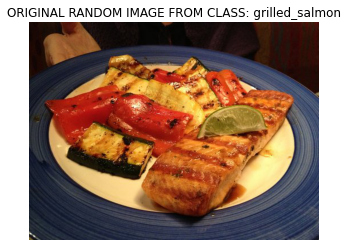

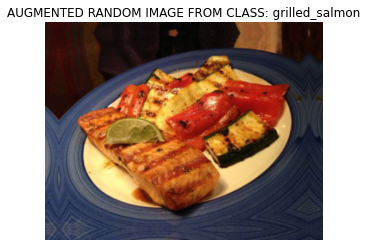

In [ ]:
# Viewing A Random Image And Comparing It To Its Augmented Version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data.class_names)
target_dir = '/content/10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

# Read And Plot In The Random Image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'ORIGINAL RANDOM IMAGE FROM CLASS: {target_class}')
plt.axis(False);

# Now Let's Plot Our Augmented Random Image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0), training=True)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f'AUGMENTED RANDOM IMAGE FROM CLASS: {target_class}')
plt.axis(False)

##CREATING MODEL 1 USING DATA AUGMENTATION 

In [ ]:
# Setting-up Input Shape And Base Model, Freezing The Base Model Layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Creating input Layer
inputs = layers.Input(shape=input_shape, name='InputLayer')

# Adding Data Augmentation Sequential Model As A Layer
x = data_augmentation(inputs)

# Giving base_model The Inputs
x = base_model(x, training=False)

# Pooling Output Features Of The Base Model
x = layers.GlobalAveragePooling2D(name='GlobalAveragePoolinglayer')(x)

# Putting A Dense Layer As The Output
outputs = layers.Dense(10, activation='softmax', name='OutputLayer')(x)

# Making A Model
model_1 = tf.keras.Model(inputs, outputs)

# Compiling The Model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting The Model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                               experiment_name='1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220731-054811
Epoch 1/5


3/3 [==============================] - ETA: 0s - loss: 2.3666 - accuracy: 0.1000WARNING:tensorflow:Model was constructed with shape (512, 384, 3) for input KerasTensor(type_spec=TensorSpec(shape=(512, 384, 3), dtype=tf.uint8, name='random_flip_1_input'), name='random_flip_1_input', description="created by layer 'random_flip_1_input'"), but it was called on an input with incompatible shape (None, 224, 224, 3).


3/3 [==============================] - 22s 2s/step - loss: 2.3666 - accuracy: 0.1000 - val_loss: 2.2604 - val_accuracy: 0.1760
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1610 - accuracy: 0.2143 - val_loss: 2.1361 - val_accuracy: 0.2385
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9930 - accuracy: 0.3714 - val_loss: 2.0450 - val_accuracy: 0.2977
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7992 - accuracy: 0.5857 - val_loss: 1.9497 - val_accuracy: 0.3454
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6060 - accuracy: 0.5571 - val_loss: 1.8602 - val_accuracy: 0.4030


In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 DATA_AUGMENTATION (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GlobalAveragePoolinglayer (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 OutputLayer (Dense)         (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

In [ ]:
# Evaluating On The Full Test Dataset
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 8s 90ms/step - loss: 1.8686 - accuracy: 0.4028


[1.8685929775238037, 0.4027999937534332]

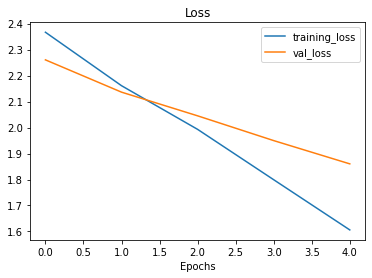

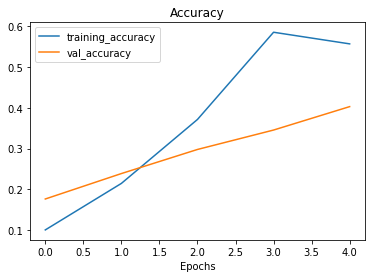

In [ ]:
plot_loss_curves(history_1)

##MODEL 2: FEATURE EXTRACTION TRANSFER LEARNING MODEL WITH 10% OF DATA AND DATA AUGMENTATION

In [ ]:
# Getting 10% Of Data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-08-01 05:43:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.130.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   116MB/s    in 1.4s    

2022-08-01 05:43:04 (116 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data('/content/10_food_classes_10_percent.zip')

In [ ]:
train_dir_10_percent = '/content/10_food_classes_10_percent/train/'
test_dir = '/content/10_food_classes_10_percent/test/'

In [ ]:
# Setting Up Data Loaders
import tensorflow as tf
IMG_SIZE = (224, 224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Creating Model 2 With Data Augmentation Built In
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Building Data Augmentation Layer
data_augmentation = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
], name='DataAugmentation')

# Setting-Up The Input Shape
input_shape = (224, 224, 3)

# Creating A Frozen Base Model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Creating The inputs And outputs
inputs = layers.Input(shape=input_shape, name='InputLayer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D')(x)
outputs = layers.Dense(10, activation='softmax', name='OutputLayer')(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compiling The Model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

16719872/16705208 [==============================] - 0s 0us/step


###CREATING A MODEL CHECKPOINT CALLBACK

In [ ]:
# Setting Checkpoint Path
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt'

# Creating A ModelCheckpoint Callback That Saves The Model's Weights Only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only = False,
                                                         save_freq='epoch',
                                                         verbose=1)

In [ ]:
# Fitting model_2 Passing In The ModelCheckpoint Callback For Every Epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                                 experiment_name='10_percent_data_aug'),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220801-054340
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0230 - accuracy: 0.3240
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 31s 546ms/step - loss: 2.0230 - accuracy: 0.3240 - val_loss: 1.4865 - val_accuracy: 0.6743
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3593 - accuracy: 0.6653
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 451ms/step - loss: 1.3593 - accuracy: 0.6653 - val_loss: 1.0898 - val_accuracy: 0.7566
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0697 - accuracy: 0.7373
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 358ms/step - loss: 1.0697 - accuracy: 0.7373 - val_loss: 0.9003 - val_accuracy: 0.7812
Ep

In [ ]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 76ms/step - loss: 0.6961 - accuracy: 0.8104


[0.6960770487785339, 0.8104000091552734]

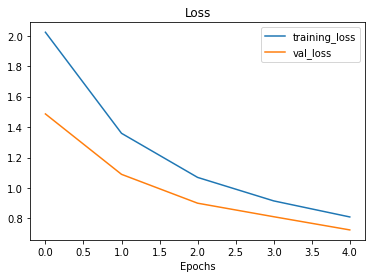

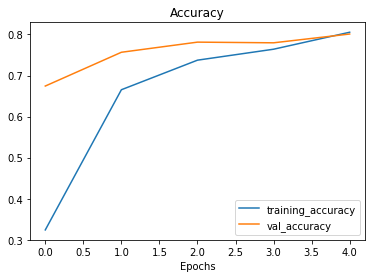

In [ ]:
# Plotting Model Loss Curves
plot_loss_curves(history_10_percent_data_aug)

###LOADING IN CHECKPOINTED WEIGHTS

In [ ]:
# Loading In Saved Model Weights And Evaluating Model
model_2.load_weights(checkpoint_path)

In [ ]:
# Evaluating model_2 With Loaded Weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.6961 - accuracy: 0.8104


##MODEL 3 : FINE-TUNING AN EXISTING MODEL ON 10% OF THE DATA

In [ ]:
model_2.layers

In [ ]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f5d44545ed0> True
<keras.engine.sequential.Sequential object at 0x7f5d445455d0> True
<keras.engine.functional.Functional object at 0x7f5d440e09d0> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f5d452c8310> True
<keras.layers.core.dense.Dense object at 0x7f5d46d817d0> True


In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
# How Many Trainable Variables In Our Base Model?
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
# To Begin Fine-Tuning, Let's Start By Setting The Last 10 Layers Of Our base_model.trainable = True
base_model.trainable = True

# Freezing All Layers Except For The Last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompiling
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Checking Which Layers Are Tunable (Trainable)
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
# Let's Check Number Of Trainable Variables
print(len(model_2.trainable_variables))

12


In [ ]:
# Fine Tuning For Another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refitting The Model
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               validation_steps=int(0.25 * len(test_data)),
                                               initial_epoch=history_10_percent_data_aug.epoch[-1],
                                               callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                                      experiment_name='10_percent_fine_tune_10')])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_10/20220801-054636
Epoch 5/10
24/24 [==============================] - 20s 456ms/step - loss: 0.6777 - accuracy: 0.8027 - val_loss: 0.6301 - val_accuracy: 0.7911
Epoch 6/10
24/24 [==============================] - 8s 314ms/step - loss: 0.5874 - accuracy: 0.8213 - val_loss: 0.5774 - val_accuracy: 0.8010
Epoch 7/10
24/24 [==============================] - 9s 363ms/step - loss: 0.4890 - accuracy: 0.8507 - val_loss: 0.5612 - val_accuracy: 0.8010
Epoch 8/10
24/24 [==============================] - 9s 352ms/step - loss: 0.4752 - accuracy: 0.8533 - val_loss: 0.5610 - val_accuracy: 0.8125
Epoch 9/10
24/24 [==============================] - 9s 341ms/step - loss: 0.4150 - accuracy: 0.8667 - val_loss: 0.5565 - val_accuracy: 0.8306
Epoch 10/10
24/24 [==============================] - 8s 320ms/step - loss: 0.3931 - accuracy: 0.8800 - val_loss: 0.5637 - val_accuracy: 0.7961


In [ ]:
# Evaluating The Fine-Tuned Model
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.5142 - accuracy: 0.8260


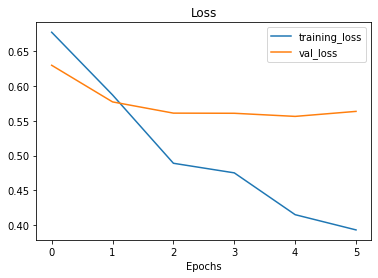

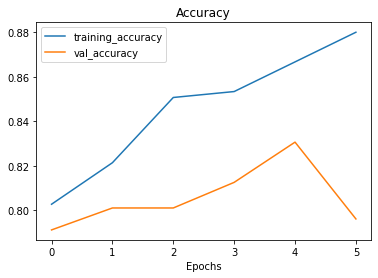

In [ ]:
# Plotting Loss Curves Of Fine-Tuned Model
plot_loss_curves(history_fine_10_percent_data_aug)

## Creating A Function To Plot Fine-Tuned Model

In [ ]:
import matplotlib.pyplot as plt

def compare_historys(original_history, new_history, initial_epochs=5):
  """
  Compares Two TensorFlow History Objects
  """
  # Getting Original History Measurements
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  # Combining Original History Metrics With New History Metrics
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # Making Plots For Accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='TRAINING ACCURACY')
  plt.plot(total_val_acc, label='VAL ACCURACY')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='START FINE TUNING')
  plt.legend(loc='lower right')
  plt.title('TRAINING AND VALIDATION ACCURACY')

  # Making Plots For Loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='TRAINING LOSS')
  plt.plot(total_val_loss, label='VAL LOSS')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='START FINE TUNING')
  plt.legend(loc='upper right')
  plt.title('TRAINING AND VALIDATION LOSS')

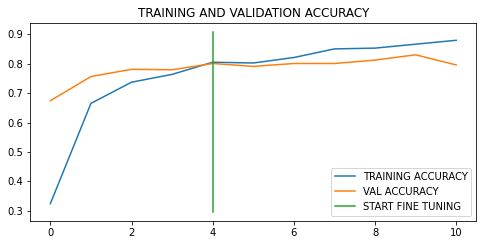

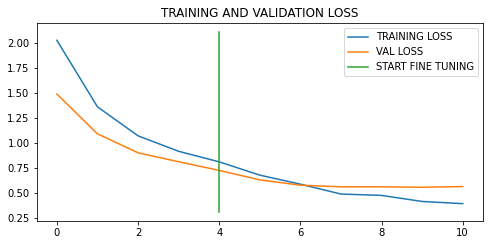

In [ ]:
compare_historys(history_10_percent_data_aug,
                 history_fine_10_percent_data_aug,
                 initial_epochs=5)

##MODEL 4 : FINE-TUNING AN EXISTNG MODEL ON ALL OF THE DATA

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-08-01 05:48:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.253.118.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  59.1MB/s    in 8.5s    

2022-08-01 05:48:39 (58.6 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
unzip_data('/content/10_food_classes_all_data.zip')

In [ ]:
# Training And Test Directories
train_dir = "10_food_classes_all_data/train/"
test_dir = '10_food_classes_all_data/test/'

In [ ]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode='categorical',
                                                                 image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Loading weights From Checkpoint
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 8s 87ms/step - loss: 0.6961 - accuracy: 0.8104


[0.696077287197113, 0.8104000091552734]

In [ ]:
results_fine_tune_10_percent

[0.5142192840576172, 0.8259999752044678]

In [ ]:
results_10_percent_data_aug

[0.6960770487785339, 0.8104000091552734]

In [ ]:
# Checking Which Layers Are Tunable In The Whole Model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 InputLayer True
1 DataAugmentation True
2 efficientnetb0 True
3 GlobalAveragePooling2D True
4 OutputLayer True


In [ ]:
# Checking Which Layers Are Tunable In base_model (efficientnetb0)
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
# Compiling
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                                 experiment_name='full_10_classes')])

Saving TensorBoard log files to: transfer_learning/full_10_classes/20220801-061457
Epoch 5/10
235/235 [==============================] - 60s 228ms/step - loss: 0.7339 - accuracy: 0.7620 - val_loss: 0.4302 - val_accuracy: 0.8438
Epoch 6/10
235/235 [==============================] - 49s 208ms/step - loss: 0.5966 - accuracy: 0.8056 - val_loss: 0.3991 - val_accuracy: 0.8602
Epoch 7/10
235/235 [==============================] - 43s 183ms/step - loss: 0.5338 - accuracy: 0.8255 - val_loss: 0.3588 - val_accuracy: 0.8799
Epoch 8/10
235/235 [==============================] - 45s 189ms/step - loss: 0.4922 - accuracy: 0.8420 - val_loss: 0.3886 - val_accuracy: 0.8717
Epoch 9/10
235/235 [==============================] - 39s 162ms/step - loss: 0.4532 - accuracy: 0.8553 - val_loss: 0.3498 - val_accuracy: 0.8882
Epoch 10/10
235/235 [==============================] - 37s 156ms/step - loss: 0.4295 - accuracy: 0.8587 - val_loss: 0.3512 - val_accuracy: 0.8882


In [ ]:
# Evaluating
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 7s 87ms/step - loss: 0.3258 - accuracy: 0.8940


[0.3258390724658966, 0.8939999938011169]

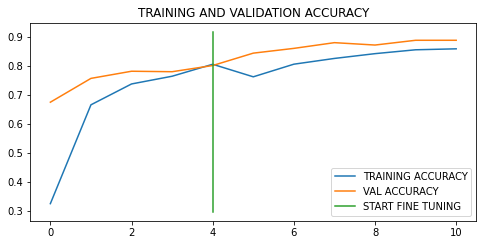

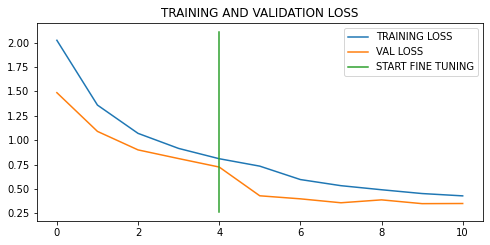

In [ ]:
compare_historys(original_history=history_10_percent_data_aug,
                new_history=history_fine_10_classes_full,
                initial_epochs=5)

##VIEWING OUR EXPERIMENTS DATA ON TENSORBOARD